In [1]:
library(glmnet)
library(ggplot2)

Loading required package: Matrix
Loading required package: foreach
Loaded glmnet 2.0-13



In [2]:
options(stringsAsFactors = FALSE)

In [3]:
base_dir <- "/allen/aics/gene-editing/RNA_seq/scRNAseq_SeeligCollaboration/12012017_cardio/seurat/all_cells/regressions/reg1/feature_selection/"

In [4]:
load(paste0(base_dir, "late.RData"))

In [5]:
length(bootstraps)

[1] 1000

In [6]:
lambda_sequence <- bootstraps[[1]][["lambda"]]
genes <- rownames(coef(bootstraps[[1]], s = lambda_sequence[1]))

In [7]:
head(genes)

[1] "(Intercept)"  "TTN_HUMAN"    "AATF_HUMAN"   "NEXN_HUMAN"   "SOD2_HUMAN"  
[6] "MALAT1_HUMAN"

In [8]:
head(lambda_sequence)

[1] 0.5630120 0.5350366 0.5084513 0.4831870 0.4591781 0.4363621

In [9]:
genes <- genes[2:length(genes)]

In [10]:
head(genes)
length(genes)
num_genes <- length(genes)

[1] "TTN_HUMAN"    "AATF_HUMAN"   "NEXN_HUMAN"   "SOD2_HUMAN"   "MALAT1_HUMAN"
[6] "PIGP_HUMAN"

[1] 22187

In [11]:
nonzero_gene_count <- c()
lambda <- min(lambda_sequence)

genes_coeff <- coef(bootstraps[[1]], s = lambda)
genes_coeff <- genes_coeff[2:length(genes_coeff),]
gene_names <- names(genes_coeff)
genes_nonzero <- gene_names[abs(genes_coeff) > 0]
nonzero_gene_count <- c(nonzero_gene_count, length(genes_nonzero))

genes_intersect <- genes_nonzero

for (i in 2:length(bootstraps)) {
    lambda_seq <- bootstraps[[i]][["lambda"]]
    if (lambda < tail(lambda_seq, n = 1)) {
        print(i)
    } 
    genes_coeff <- coef(bootstraps[[i]], s = lambda)
    genes_coeff <- genes_coeff[2:length(genes_coeff),]
    gene_names <- names(genes_coeff)
    genes_nonzero <- gene_names[abs(genes_coeff) > 0]
    nonzero_gene_count <- c(nonzero_gene_count, length(genes_nonzero))
    genes_intersect <- intersect(genes_intersect, genes_nonzero)
}

### Non-zero genes in all rounds

In [12]:
print(length(genes_intersect))
genes_intersect

[1] 27


[1] "COL2A1_HUMAN"    "KCNIP4_HUMAN"    "SORCS1_HUMAN"    "ROBO2_HUMAN"    
 [5] "PTCHD4_HUMAN"    "GPC6_HUMAN"      "KIF26B_HUMAN"    "CNTN5_HUMAN"    
 [9] "COL4A2_HUMAN"    "SYT1_HUMAN"      "TENM3_HUMAN"     "TENM4_HUMAN"    
[13] "RBMS3_HUMAN"     "SPHKAP_HUMAN"    "NEAT1_HUMAN"     "DLEU1_HUMAN"    
[17] "NRP2_HUMAN"      "CASC9_HUMAN"     "NR2F2-AS1_HUMAN" "LAMA1_HUMAN"    
[21] "SGIP1_HUMAN"     "QRFPR_HUMAN"     "DACT1_HUMAN"     "HSPB7_HUMAN"    
[25] "SOX6_HUMAN"      "PPP1R3A_HUMAN"   "PRRX1_HUMAN"

### Distribution of non-zero genes at min lambda

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


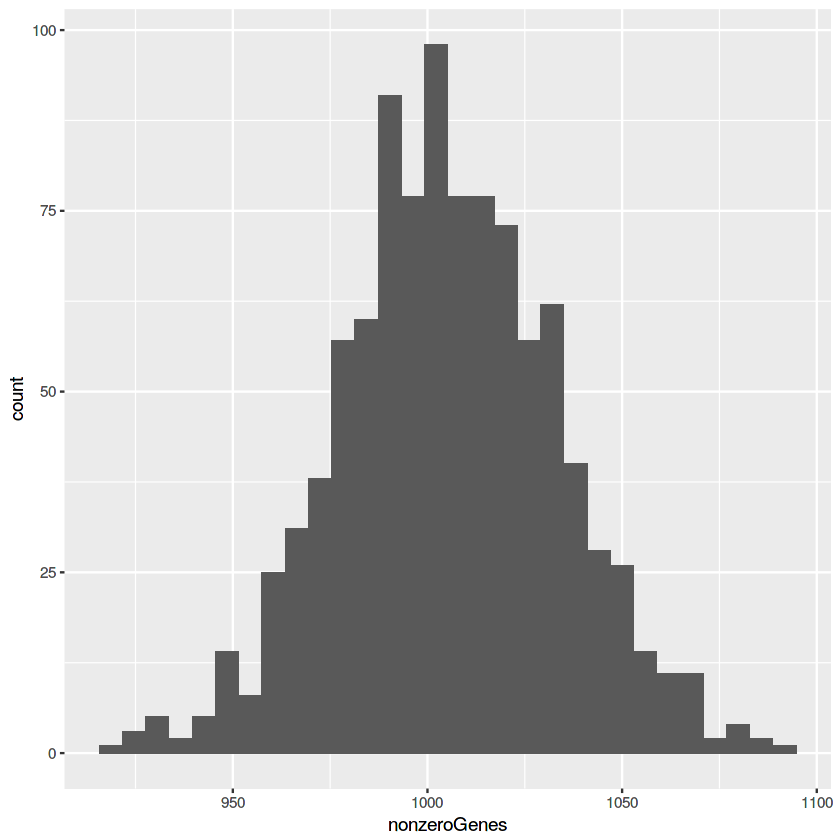

In [13]:
nonzero_gene_count <- as.data.frame(nonzero_gene_count)
colnames(nonzero_gene_count) <- "nonzeroGenes"
ggplot(nonzero_gene_count) + geom_histogram(aes(nonzeroGenes))

### Compare gene list to previous analysis (remove_1s2exp data)

In [14]:
remove_1st2exp_genes <- c('ACTA1_HUMAN','FBN2_HUMAN','MYH6_HUMAN','COL2A1_HUMAN','ADAMTS12_HUMAN','CCDC141_HUMAN','FAM189A2_HUMAN','GRIN2A_HUMAN','GOLIM4_HUMAN','PRTG_HUMAN','PLN_HUMAN','VCAN_HUMAN','MYO1D_HUMAN','CNTN5_HUMAN','BMPER_HUMAN','KCNH7_HUMAN','FAM19A4_HUMAN','ATP1A1_HUMAN','WWOX_HUMAN','SAMD4A_HUMAN','SPHKAP_HUMAN','MYH7_HUMAN','SEMA5A_HUMAN','FBXL7_HUMAN','PAM_HUMAN','PDGFD_HUMAN','RNF150_HUMAN','ADAM28_HUMAN','MEF2C_HUMAN','H19_HUMAN','RBFOX2_HUMAN','LINC00881_HUMAN','MLIP_HUMAN','GAS6_HUMAN','ADAM23_HUMAN','EPB41L4A_HUMAN','MOXD1_HUMAN','SV2C_HUMAN','PRSS35_HUMAN','QRFPR_HUMAN','DOK4_HUMAN','LIN28A_HUMAN')
x <- intersect(remove_1st2exp_genes, genes_intersect)
x
length(x)

[1] "COL2A1_HUMAN" "CNTN5_HUMAN"  "SPHKAP_HUMAN" "QRFPR_HUMAN"

[1] 4

Only 4 genes are detected in both analyses

### Caclulate fold changes for genes

In [15]:
library(dplyr)


Attaching package: ‘dplyr’

The following objects are masked from ‘package:stats’:

    filter, lag

The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union



In [16]:
load("/allen/aics/gene-editing/RNA_seq/scRNAseq_SeeligCollaboration/12012017_cardio/seurat/all_cells/regressions/reg1/train_cm_filtered_cells_entrez_only_normalized_counts.RData")

In [17]:
cell_metadata <- read.csv("/allen/aics/gene-editing/RNA_seq/scRNAseq_SeeligCollaboration/12012017_cardio/seurat/all_cells/regressions/reg1/train_cm_filtered_cells_entrez_only_metadata.csv")

In [18]:
head(cell_metadata)

X,nGene,nUMI,orig.ident,day,protocol,cell_line,diff_harvest,passage,scientist,diff_exp,sci_exp,ctnt,cell_sample
AAACATCGAAACATCG_14_6,1577,2986,SeuratProject,D12,Lian,AICS11,08_8_2017,44,KG,7_24_2017,KG_7_24,90,15
AAACATCGAAACATCG_21_10,578,727,SeuratProject,D14,Murry,AICS0,08_11_2017,28,KG,7_27_2017,KG_7_27,78,22
AAACATCGAACAACCA_2_9,489,606,SeuratProject,D12,Lian,AICS37,07_24_2017,34,AN,7_10_2017,AN_7_10,89,3
AAACATCGAACAACCA_5_8,1117,1511,SeuratProject,D14,Murry,AICS0,07_28_2017,32,AN,7_13_2017,AN_7_13,75,6
AAACATCGAACGCTTA_32_8,940,1599,SeuratProject,D24,Lian,AICS11,08_18_2017,44,KG,7_24_2017,KG_7_24,92,33
AAACATCGAACTCACC_26_2,2282,4392,SeuratProject,D12,Lian,AICS37,08_11_2017,37,KG,7_27_2017,KG_7_27,87,27


In [19]:
cardioAICS <- t(cardioAICS)

late_cells <- cell_metadata$day %in% c("D24", "D26")
cardioAICS <- cardioAICS[late_cells,]

diff_day <- cell_metadata$day[late_cells]

names(diff_day) <- cell_metadata$X[late_cells]

cell_metadata <- cell_metadata[late_cells,]

In [20]:
head(cell_metadata)

,X,nGene,nUMI,orig.ident,day,protocol,cell_line,diff_harvest,passage,scientist,diff_exp,sci_exp,ctnt,cell_sample
5,AAACATCGAACGCTTA_32_8,940,1599,SeuratProject,D24,Lian,AICS11,08_18_2017,44,KG,7_24_2017,KG_7_24,92,33
11,AAACATCGAAGAGATC_46_1,1697,2722,SeuratProject,D24,Lian,AICS37,08_22_2017,36,AN,7_27_2017,AN_7_27,65,47
12,AAACATCGAAGGACAC_35_12,1659,2651,SeuratProject,D26,Murry,AICS11,08_18_2017,44,AN,7_24_2017,AN_7_24,92,36
18,AAACATCGACAAGCTA_44_7,412,499,SeuratProject,D24,Lian,AICS37,08_22_2017,37,KG,7_27_2017,KG_7_27,84,45
22,AAACATCGACACGACC_28_5,2200,4082,SeuratProject,D24,Lian,AICS0,08_16_2017,33,AN,7_20_2017,AN_7_20,68,29
25,AAACATCGACAGCAGA_28_12,1544,2503,SeuratProject,D24,Lian,AICS0,08_16_2017,33,AN,7_20_2017,AN_7_20,68,29


In [21]:
genes.use <- genes_intersect

cytokine_cells <- cell_metadata$X[cell_metadata$protocol == "Murry"]
small_mol_cells <- cell_metadata$X[cell_metadata$protocol == "Lian"]

cytokine_exp_mat <- cardioAICS[cytokine_cells,]
small_mol_exp_mat <- cardioAICS[small_mol_cells,]

foldChange_list <- list()
for (i in 1:length(genes.use)) {
    gene <- genes.use[i]
    cytokine_exp <- cytokine_exp_mat[,gene]
    small_mol_exp <- small_mol_exp_mat[,gene]
    log2fc <- log2(mean(expm1(small_mol_exp)) + 1) - log2(mean(expm1(cytokine_exp)) + 1)
    foldChange_list[[gene]] <- log2fc
    
}

lfc_df <- data.frame("log2fc" = as.numeric(foldChange_list), "gene" = names(foldChange_list), row.names = names(foldChange_list))
lfc_df <- dplyr::arrange(lfc_df, log2fc)

In [22]:
lfc_df

log2fc,gene
-2.31623337,CNTN5_HUMAN
-0.99836845,ROBO2_HUMAN
-0.76626134,SOX6_HUMAN
-0.75889264,KIF26B_HUMAN
-0.60881212,DACT1_HUMAN
-0.59181289,SPHKAP_HUMAN
-0.58328797,SORCS1_HUMAN
-0.55093675,PPP1R3A_HUMAN
-0.21021912,RBMS3_HUMAN
-0.09507894,PRRX1_HUMAN


### Fit using 27 genes

In [23]:
diff_day <- as.factor(diff_day)

In [24]:
head(diff_day)

AAACATCGAACGCTTA_32_8  AAACATCGAAGAGATC_46_1 AAACATCGAAGGACAC_35_12 
                   D24                    D24                    D26 
 AAACATCGACAAGCTA_44_7  AAACATCGACACGACC_28_5 AAACATCGACAGCAGA_28_12 
                   D24                    D24                    D24 
Levels: D24 D26

In [25]:
library(boot)

In [26]:
subset_cardio <- cardioAICS[,genes.use]
subset_cardio <- as.data.frame(as.matrix(subset_cardio))

In [27]:
head(subset_cardio)

,COL2A1_HUMAN,KCNIP4_HUMAN,SORCS1_HUMAN,ROBO2_HUMAN,PTCHD4_HUMAN,GPC6_HUMAN,KIF26B_HUMAN,CNTN5_HUMAN,COL4A2_HUMAN,SYT1_HUMAN,⋯,CASC9_HUMAN,NR2F2-AS1_HUMAN,LAMA1_HUMAN,SGIP1_HUMAN,QRFPR_HUMAN,DACT1_HUMAN,HSPB7_HUMAN,SOX6_HUMAN,PPP1R3A_HUMAN,PRRX1_HUMAN
AAACATCGAACGCTTA_32_8,0.000000,5.421157,0.00000,1.981540,1.981540,0.000000,3.258698,4.331350,1.981540,0.000000,⋯,0,0,0.000000,0,0,0,1.98154,0.000000,0,0
AAACATCGAAGAGATC_46_1,1.541966,0.000000,0.00000,2.121967,1.541966,1.541966,3.414119,0.000000,0.000000,0.000000,⋯,0,0,0.000000,0,0,0,0.00000,0.000000,0,0
AAACATCGAAGGACAC_35_12,0.000000,2.145267,0.00000,0.000000,0.000000,1.562799,3.912785,1.562799,0.000000,0.000000,⋯,0,0,0.000000,0,0,0,0.00000,1.562799,0,0
AAACATCGACAAGCTA_44_7,0.000000,0.000000,0.00000,0.000000,0.000000,3.046429,0.000000,0.000000,0.000000,0.000000,⋯,0,0,0.000000,0,0,0,0.00000,0.000000,0,0
AAACATCGACACGACC_28_5,1.238310,0.000000,1.23831,1.238310,0.000000,3.025205,3.025205,0.000000,3.693779,0.000000,⋯,0,0,3.563796,0,0,0,0.00000,3.025205,0,0
AAACATCGACAGCAGA_28_12,1.608479,2.563842,0.00000,0.000000,3.043380,4.760985,0.000000,4.613933,1.608479,2.196159,⋯,0,0,0.000000,0,0,0,0.00000,0.000000,0,0


In [28]:
dim(subset_cardio)

[1] 4773   27

In [29]:
fit <- glm(diff_day ~ .,
    data = subset_cardio, family = binomial("logit")
   )

In [30]:
fit


Call:  glm(formula = diff_day ~ ., family = binomial("logit"), data = subset_cardio)

Coefficients:
      (Intercept)       COL2A1_HUMAN       KCNIP4_HUMAN       SORCS1_HUMAN  
           0.2847            -0.3881            -0.3323             0.3108  
      ROBO2_HUMAN       PTCHD4_HUMAN         GPC6_HUMAN       KIF26B_HUMAN  
           0.3683            -0.4988            -0.3070             0.5061  
      CNTN5_HUMAN       COL4A2_HUMAN         SYT1_HUMAN        TENM3_HUMAN  
           0.5638            -0.3143            -0.5946            -0.4330  
      TENM4_HUMAN        RBMS3_HUMAN       SPHKAP_HUMAN        NEAT1_HUMAN  
          -0.3244             0.3641             0.2732            -0.2388  
      DLEU1_HUMAN         NRP2_HUMAN        CASC9_HUMAN  `NR2F2-AS1_HUMAN`  
          -0.4787            -0.3250            -0.6158            -1.3699  
      LAMA1_HUMAN        SGIP1_HUMAN        QRFPR_HUMAN        DACT1_HUMAN  
          -0.3205            -0.6215            -0.7

In [31]:
subset_cardio$diff_day <- diff_day

In [32]:
cost <- function(r, pi = 0) mean(abs(r-pi) > 0.5)
cv.test <- cv.glm(subset_cardio, cost = cost, fit, K = 5)

In [33]:
cv.test$delta

[1] 0.1016132 0.1019065

In [35]:
load("/allen/aics/gene-editing/RNA_seq/scRNAseq_SeeligCollaboration/12012017_cardio/seurat/all_cells/regressions/reg1/holdout_cm_filtered_cells_entrez_only_normalized_counts.RData")
holdout_cell_metadata <- read.csv("/allen/aics/gene-editing/RNA_seq/scRNAseq_SeeligCollaboration/12012017_cardio/seurat/all_cells/regressions/reg1/holdout_cm_filtered_cells_entrez_only_metadata.csv")

In [36]:
holdout_cardioAICS <- t(holdout_cardioAICS)
holdout_late_cells <- holdout_cell_metadata$day %in% c("D24", "D26")
holdout_cardioAICS <- holdout_cardioAICS[holdout_late_cells,]

diff_day <- holdout_cell_metadata$day[holdout_late_cells]

names(diff_day) <- holdout_cell_metadata$X[holdout_late_cells]

holdout_cell_metadata <- holdout_cell_metadata[holdout_late_cells,]

In [37]:
holdout_cardioAICS

   [[ suppressing 33 column names ‘TTN_HUMAN’, ‘AATF_HUMAN’, ‘NEXN_HUMAN’ ... ]]


539 x 22187 sparse Matrix of class "dgCMatrix"
                                                                       
AAACATCGATCCTGTA_47_6  6.5255165 .         3.3498237 .         5.684630
AAACATCGCGCTGATC_32_5  6.1502536 .         .         .         5.372613
AAACATCGCTGGCATA_32_4  6.4196208 .         2.1660774 1.2738715 5.875784
AACAACCAAAGGACAC_29_6  6.3807176 .         2.1503907 0.8174433 6.200447
AACAACCAACCTCCAA_36_2  .         .         .         .         6.021545
AACAACCAACGCTCGA_45_4  3.0577129 .         .         .         5.279052
AACAACCAATGCCTAA_44_11 6.3923394 .         3.5573903 .         6.069751
AACAACCAGCCACATA_42_8  6.4467977 .         2.3607381 1.5768132 5.891406
AACAACCAGCGAGTAA_46_5  .         .         .         .         5.561410
AACAACCAGCTAACGA_40_3  .         .         .         1.7449994 5.775672
AACAACCATGGTGGTA_38_3  6.3657550 1.7507436 2.6166916 0.9502261 6.602643
AACAACCATTCACGCA_37_10 6.3654071 .         2.8535218 .         4.623181
AACCGAGAAACGCTTA_

In [38]:
holdout_mat <- holdout_cardioAICS[,genes.use]
holdout_mat <- as.data.frame(as.matrix(holdout_mat))

In [39]:
holdout_mat

,COL2A1_HUMAN,KCNIP4_HUMAN,SORCS1_HUMAN,ROBO2_HUMAN,PTCHD4_HUMAN,GPC6_HUMAN,KIF26B_HUMAN,CNTN5_HUMAN,COL4A2_HUMAN,SYT1_HUMAN,⋯,CASC9_HUMAN,NR2F2-AS1_HUMAN,LAMA1_HUMAN,SGIP1_HUMAN,QRFPR_HUMAN,DACT1_HUMAN,HSPB7_HUMAN,SOX6_HUMAN,PPP1R3A_HUMAN,PRRX1_HUMAN
AAACATCGATCCTGTA_47_6,1.4000249,2.9617517,1.4000249,1.961587,2.3190393,2.5818219,4.222688,2.581822,0.0000000,1.961587,⋯,0,0.0000000,0.000000,1.4000249,0.0000000,0.0000000,0.0000000,0.000000,0.0000000,0.000000
AAACATCGCGCTGATC_32_5,0.0000000,5.3726126,0.0000000,0.000000,0.0000000,3.0200920,3.688538,3.020092,0.0000000,0.000000,⋯,0,0.0000000,0.000000,3.0200920,0.0000000,0.0000000,0.0000000,0.000000,0.0000000,0.000000
AAACATCGCTGGCATA_32_4,0.0000000,3.8574396,0.0000000,1.273872,2.4246842,0.0000000,3.286409,2.166077,1.8163432,1.273872,⋯,0,0.0000000,0.000000,0.0000000,0.0000000,0.0000000,0.0000000,0.000000,0.0000000,0.000000
AACAACCAAAGGACAC_29_6,1.2611291,0.8174433,0.0000000,3.113512,0.0000000,0.8174433,3.220049,2.516270,0.0000000,0.000000,⋯,0,0.0000000,0.000000,0.0000000,0.0000000,0.0000000,0.8174433,0.000000,0.0000000,0.000000
AACAACCAACCTCCAA_36_2,0.0000000,0.0000000,0.0000000,0.000000,0.0000000,0.0000000,0.000000,0.000000,0.0000000,0.000000,⋯,0,0.0000000,0.000000,0.0000000,0.0000000,0.0000000,0.0000000,0.000000,0.0000000,0.000000
AACAACCAACGCTCGA_45_4,1.2626721,0.0000000,0.0000000,0.000000,0.0000000,2.4104899,2.410490,1.262672,1.8033106,1.262672,⋯,0,0.0000000,0.000000,1.8033106,0.0000000,0.0000000,0.0000000,3.271413,0.0000000,0.000000
AACAACCAATGCCTAA_44_11,3.1660811,4.1504808,0.0000000,0.000000,0.0000000,3.8379185,2.514238,0.000000,1.8989071,0.000000,⋯,0,0.0000000,2.892357,1.8989071,2.5142375,0.0000000,2.5142375,0.000000,0.0000000,0.000000
AACAACCAGCCACATA_42_8,0.0000000,0.0000000,2.6698830,2.905687,0.0000000,1.0714995,3.179596,5.590412,0.0000000,0.000000,⋯,0,0.0000000,0.000000,0.0000000,0.0000000,0.0000000,1.9109138,1.071499,0.0000000,0.000000
AACAACCAGCGAGTAA_46_5,2.7171821,0.0000000,2.7171821,0.000000,0.0000000,3.2012281,0.000000,4.452318,0.0000000,0.000000,⋯,0,1.7426629,0.000000,0.0000000,0.0000000,0.0000000,0.0000000,0.000000,0.0000000,0.000000
AACAACCAGCTAACGA_40_3,0.0000000,0.0000000,0.0000000,0.000000,0.0000000,2.9909002,0.000000,0.000000,2.3467738,0.000000,⋯,0,0.0000000,0.000000,0.0000000,0.0000000,0.0000000,0.0000000,3.528748,0.0000000,0.000000


In [40]:
dim(holdout_mat)

[1] 539  27

In [41]:
holdout_predict <- predict(fit, newdata = holdout_mat, type = c("response"))

In [42]:
holdout_predict

AAACATCGATCCTGTA_47_6  AAACATCGCGCTGATC_32_5  AAACATCGCTGGCATA_32_4 
          4.656569e-01           1.740431e-02           1.687342e-01 
 AACAACCAAAGGACAC_29_6  AACAACCAACCTCCAA_36_2  AACAACCAACGCTCGA_45_4 
          9.833710e-01           5.999057e-02           7.078766e-01 
AACAACCAATGCCTAA_44_11  AACAACCAGCCACATA_42_8  AACAACCAGCGAGTAA_46_5 
          1.049658e-04           9.992474e-01           6.392925e-02 
 AACAACCAGCTAACGA_40_3  AACAACCATGGTGGTA_38_3 AACAACCATTCACGCA_37_10 
          6.465796e-01           4.398875e-01           4.336685e-01 
AACCGAGAAACGCTTA_42_10  AACCGAGACCTCTATC_42_9  AACGCTTACCGACAAC_42_1 
          9.626034e-01           9.208425e-01           6.393635e-01 
 AACGCTTACCTCCTGA_47_3 AACGCTTAGCCACATA_47_12  AACGCTTAGCTCGGTA_36_7 
          9.802678e-01           9.791943e-01           3.666418e-02 
 AACGCTTAGTACGCAA_40_7  AACGTGATAGAGTCAA_42_3  AACGTGATAGCCATGC_37_2 
          9.971491e-01           9.984547e-01           5.990635e-01 
AACGTGATCACCTTAC_42_10  AACGTGATCACTTCGA_34_2 AACGTGATCAGCGTTA_29_12 
          9.841371e-01           9.419135e-03           9.678767e-01 
AACGTGATCTGAGCCA_34_11  AACGTGATGATAGACA_42_4 AACGTGATGCTAACGA_28_12 
          1.038160e-01           6.723169e-01           7.824577e-01 
 AACGTGATGTCTGTCA_43_3  AACTCACCACACGACC_37_3  AACTCACCACAGCAGA_46_3 
          2.815455e-01           6.056805e-01           2.717950e-01 
 AACTCACCAGAGTCAA_35_3  AACTCACCCCAGTTCA_29_6  AACTCACCCGCATACA_45_6 
          9.726479e-01           6.091920e-01           8.525037e-01 
 AAGACGGAAAACATCG_36_8  AAGACGGAAAGACGGA_31_3  AAGACGGAACACAGAA_29_6 
          4.968251e-02           8.591609e-01           9.924914e-01 
AAGACGGAAGCAGGAA_30_12  AAGACGGAAGCAGGAA_36_6 AAGACGGAAGCCATGC_47_11 
          7.134654e-03           5.828688e-03           9.716286e-01 
 AAGACGGACATACCAA_41_7  AAGACGGAGTCTGTCA_41_6 AAGACGGATCTTCACA_28_10 
          5.323995e-01           9.796210e-01           2.469958e-01 
 AAGAGATCACATTGGC_33_7 AAGAGATCATAGCGAC_39_12  AAGAGATCCTGAGCCA_45_1 
          5.737919e-03           9.616829e-01           8.878357e-01 
 AAGGACACACACAGAA_44_5 AAGGACACACCACTGT_37_10 AAGGACACCGACACAC_33_11 
          1.611828e-02           9.528362e-01           9.819029e-01 
AAGGACACCTAAGGTC_42_11  AAGGACACGCCACATA_39_9  AAGGACACTGGTGGTA_36_7 
          9.767124e-01           8.150043e-01           1.720996e-02 
 AATCCGTCACAGCAGA_44_8  AATCCGTCAGTACAAG_38_1  AATCCGTCATCATTCC_36_2 
          7.034946e-01           1.709878e-03           3.296980e-03 
 AATCCGTCGAACAGGC_40_7  AATCCGTCTGGTGGTA_40_6  AATGTTGCAACGCTTA_43_2 
          9.754931e-01           9.966828e-01           8.481339e-02 
 AATGTTGCCAATGGAA_29_3 AATGTTGCGAACAGGC_47_10  AATGTTGCGACTAGTA_36_9 
          9.730565e-01           9.540571e-01           3.230873e-01 
 ACAAGCTAAACCGAGA_32_6 ACAAGCTAAGCCATGC_36_10  ACAAGCTACCTCTATC_28_8 
          8.533280e-02           1.343699e-02           3.337695e-02 
 ACAAGCTAGCGAGTAA_31_8  ACAAGCTAGCTCGGTA_41_6  ACAAGCTAGGTGCGAA_45_6 
          6.307589e-01           9.940164e-01           9.948169e-01 
 ACACAGAACCATCCTC_30_7  ACACAGAACTGGCATA_41_9 ACACGACCAACGCTTA_43_12 
          8.663542e-01           8.766099e-01           6.435891e-02 
ACACGACCAAGGACAC_35_12  ACACGACCAAGGTACA_39_3  ACACGACCACAAGCTA_41_1 
          2.279788e-02           8.734605e-01           9.935044e-01 
 ACACGACCAGTACAAG_34_4  ACAGATTCACAGATTC_39_5  ACAGATTCGAACAGGC_44_6 
          4.515817e-01           8.952999e-01           2.348241e-01 
 ACAGATTCGTGTTCTA_44_6 ACAGCAGAAAGACGGA_36_11 ACAGCAGAACGTATCA_36_12 
          4.611154e-02           2.103576e-02           5.001968e-01 
 ACAGCAGATCCGTCTA_47_3  ACATTGGCAAACATCG_29_6 ACATTGGCATCCTGTA_41_10 
          9.697172e-01           9.483397e-01           9.612187e-01 
ACATTGGCCAGCGTTA_47_11  ACATTGGCCTGGCATA_35_9  ACATTGGCGGTGCGAA_29_8 
          6.874398e-01           8.901444e-01           9.160067e-01 
ACATTGGCGGTGCGAA_39_10  ACATTGGCGTACGCAA_37_2  ACATTGGCTGGAACAA_34_1 
          9

In [43]:
diff_day

AAACATCGATCCTGTA_47_6  AAACATCGCGCTGATC_32_5  AAACATCGCTGGCATA_32_4 
                 "D26"                  "D24"                  "D24" 
 AACAACCAAAGGACAC_29_6  AACAACCAACCTCCAA_36_2  AACAACCAACGCTCGA_45_4 
                 "D26"                  "D24"                  "D26" 
AACAACCAATGCCTAA_44_11  AACAACCAGCCACATA_42_8  AACAACCAGCGAGTAA_46_5 
                 "D24"                  "D26"                  "D24" 
 AACAACCAGCTAACGA_40_3  AACAACCATGGTGGTA_38_3 AACAACCATTCACGCA_37_10 
                 "D26"                  "D24"                  "D26" 
AACCGAGAAACGCTTA_42_10  AACCGAGACCTCTATC_42_9  AACGCTTACCGACAAC_42_1 
                 "D26"                  "D26"                  "D26" 
 AACGCTTACCTCCTGA_47_3 AACGCTTAGCCACATA_47_12  AACGCTTAGCTCGGTA_36_7 
                 "D26"                  "D26"                  "D24" 
 AACGCTTAGTACGCAA_40_7  AACGTGATAGAGTCAA_42_3  AACGTGATAGCCATGC_37_2 
                 "D26"                  "D26"                  "D26" 
AACGTGATCACCTTAC_42_10  AACGTGATCACTTCGA_34_2 AACGTGATCAGCGTTA_29_12 
                 "D26"                  "D24"                  "D26" 
AACGTGATCTGAGCCA_34_11  AACGTGATGATAGACA_42_4 AACGTGATGCTAACGA_28_12 
                 "D24"                  "D26"                  "D24" 
 AACGTGATGTCTGTCA_43_3  AACTCACCACACGACC_37_3  AACTCACCACAGCAGA_46_3 
                 "D24"                  "D26"                  "D24" 
 AACTCACCAGAGTCAA_35_3  AACTCACCCCAGTTCA_29_6  AACTCACCCGCATACA_45_6 
                 "D26"                  "D26"                  "D26" 
 AAGACGGAAAACATCG_36_8  AAGACGGAAAGACGGA_31_3  AAGACGGAACACAGAA_29_6 
                 "D24"                  "D26"                  "D26" 
AAGACGGAAGCAGGAA_30_12  AAGACGGAAGCAGGAA_36_6 AAGACGGAAGCCATGC_47_11 
                 "D24"                  "D24"                  "D26" 
 AAGACGGACATACCAA_41_7  AAGACGGAGTCTGTCA_41_6 AAGACGGATCTTCACA_28_10 
                 "D26"                  "D26"                  "D24" 
 AAGAGATCACATTGGC_33_7 AAGAGATCATAGCGAC_39_12  AAGAGATCCTGAGCCA_45_1 
                 "D26"                  "D26"                  "D26" 
 AAGGACACACACAGAA_44_5 AAGGACACACCACTGT_37_10 AAGGACACCGACACAC_33_11 
                 "D24"                  "D26"                  "D26" 
AAGGACACCTAAGGTC_42_11  AAGGACACGCCACATA_39_9  AAGGACACTGGTGGTA_36_7 
                 "D26"                  "D26"                  "D24" 
 AATCCGTCACAGCAGA_44_8  AATCCGTCAGTACAAG_38_1  AATCCGTCATCATTCC_36_2 
                 "D24"                  "D24"                  "D24" 
 AATCCGTCGAACAGGC_40_7  AATCCGTCTGGTGGTA_40_6  AATGTTGCAACGCTTA_43_2 
                 "D26"                  "D26"                  "D24" 
 AATGTTGCCAATGGAA_29_3 AATGTTGCGAACAGGC_47_10  AATGTTGCGACTAGTA_36_9 
                 "D26"                  "D26"                  "D24" 
 ACAAGCTAAACCGAGA_32_6 ACAAGCTAAGCCATGC_36_10  ACAAGCTACCTCTATC_28_8 
                 "D24"                  "D24"                  "D24" 
 ACAAGCTAGCGAGTAA_31_8  ACAAGCTAGCTCGGTA_41_6  ACAAGCTAGGTGCGAA_45_6 
                 "D26"                  "D26"                  "D26" 
 ACACAGAACCATCCTC_30_7  ACACAGAACTGGCATA_41_9 ACACGACCAACGCTTA_43_12 
                 "D24"                  "D26"                  "D24" 
ACACGACCAAGGACAC_35_12  ACACGACCAAGGTACA_39_3  ACACGACCACAAGCTA_41_1 
                 "D26"                  "D26"                  "D26" 
 ACACGACCAGTACAAG_34_4  ACAGATTCACAGATTC_39_5  ACAGATTCGAACAGGC_44_6 
                 "D24"                  "D26"                  "D24" 
 ACAGATTCGTGTTCTA_44_6 ACAGCAGAAAGACGGA_36_11 ACAGCAGAACGTATCA_36_12 
                 "D24"                  "D24"                  "D24" 
 ACAGCAGATCCGTCTA_47_3  ACATTGGCAAACATCG_29_6 ACATTGGCATCCTGTA_41_10 
                 "D26"                  "D26"                  "D26" 
ACATTGGCCAGCGTTA_47_11  ACATTGGCCTGGCATA_35_9  ACATTGGCGGTGCGAA_29_8 
                 "D26"                  "D26"                  "D26" 
ACATTGGCGGTGCGAA_39_10  ACATTGGCGTACGCAA_37_2  ACATTGGCTGGAACAA_34_1 
           

In [52]:
get_predicted_time <- function(predict_prob) {
    if (predict_prob < 0.5) {
        return("D24")
    } else {
        return("D26")
    }
}

In [53]:
predicted_day <- sapply(holdout_predict, get_predicted_time, simplify = TRUE)

In [54]:
predicted_day

AAACATCGATCCTGTA_47_6  AAACATCGCGCTGATC_32_5  AAACATCGCTGGCATA_32_4 
                 "D24"                  "D24"                  "D24" 
 AACAACCAAAGGACAC_29_6  AACAACCAACCTCCAA_36_2  AACAACCAACGCTCGA_45_4 
                 "D26"                  "D24"                  "D26" 
AACAACCAATGCCTAA_44_11  AACAACCAGCCACATA_42_8  AACAACCAGCGAGTAA_46_5 
                 "D24"                  "D26"                  "D24" 
 AACAACCAGCTAACGA_40_3  AACAACCATGGTGGTA_38_3 AACAACCATTCACGCA_37_10 
                 "D26"                  "D24"                  "D24" 
AACCGAGAAACGCTTA_42_10  AACCGAGACCTCTATC_42_9  AACGCTTACCGACAAC_42_1 
                 "D26"                  "D26"                  "D26" 
 AACGCTTACCTCCTGA_47_3 AACGCTTAGCCACATA_47_12  AACGCTTAGCTCGGTA_36_7 
                 "D26"                  "D26"                  "D24" 
 AACGCTTAGTACGCAA_40_7  AACGTGATAGAGTCAA_42_3  AACGTGATAGCCATGC_37_2 
                 "D26"                  "D26"                  "D26" 
AACGTGATCACCTTAC_42_10  AACGTGATCACTTCGA_34_2 AACGTGATCAGCGTTA_29_12 
                 "D26"                  "D24"                  "D26" 
AACGTGATCTGAGCCA_34_11  AACGTGATGATAGACA_42_4 AACGTGATGCTAACGA_28_12 
                 "D24"                  "D26"                  "D26" 
 AACGTGATGTCTGTCA_43_3  AACTCACCACACGACC_37_3  AACTCACCACAGCAGA_46_3 
                 "D24"                  "D26"                  "D24" 
 AACTCACCAGAGTCAA_35_3  AACTCACCCCAGTTCA_29_6  AACTCACCCGCATACA_45_6 
                 "D26"                  "D26"                  "D26" 
 AAGACGGAAAACATCG_36_8  AAGACGGAAAGACGGA_31_3  AAGACGGAACACAGAA_29_6 
                 "D24"                  "D26"                  "D26" 
AAGACGGAAGCAGGAA_30_12  AAGACGGAAGCAGGAA_36_6 AAGACGGAAGCCATGC_47_11 
                 "D24"                  "D24"                  "D26" 
 AAGACGGACATACCAA_41_7  AAGACGGAGTCTGTCA_41_6 AAGACGGATCTTCACA_28_10 
                 "D26"                  "D26"                  "D24" 
 AAGAGATCACATTGGC_33_7 AAGAGATCATAGCGAC_39_12  AAGAGATCCTGAGCCA_45_1 
                 "D24"                  "D26"                  "D26" 
 AAGGACACACACAGAA_44_5 AAGGACACACCACTGT_37_10 AAGGACACCGACACAC_33_11 
                 "D24"                  "D26"                  "D26" 
AAGGACACCTAAGGTC_42_11  AAGGACACGCCACATA_39_9  AAGGACACTGGTGGTA_36_7 
                 "D26"                  "D26"                  "D24" 
 AATCCGTCACAGCAGA_44_8  AATCCGTCAGTACAAG_38_1  AATCCGTCATCATTCC_36_2 
                 "D26"                  "D24"                  "D24" 
 AATCCGTCGAACAGGC_40_7  AATCCGTCTGGTGGTA_40_6  AATGTTGCAACGCTTA_43_2 
                 "D26"                  "D26"                  "D24" 
 AATGTTGCCAATGGAA_29_3 AATGTTGCGAACAGGC_47_10  AATGTTGCGACTAGTA_36_9 
                 "D26"                  "D26"                  "D24" 
 ACAAGCTAAACCGAGA_32_6 ACAAGCTAAGCCATGC_36_10  ACAAGCTACCTCTATC_28_8 
                 "D24"                  "D24"                  "D24" 
 ACAAGCTAGCGAGTAA_31_8  ACAAGCTAGCTCGGTA_41_6  ACAAGCTAGGTGCGAA_45_6 
                 "D26"                  "D26"                  "D26" 
 ACACAGAACCATCCTC_30_7  ACACAGAACTGGCATA_41_9 ACACGACCAACGCTTA_43_12 
                 "D26"                  "D26"                  "D24" 
ACACGACCAAGGACAC_35_12  ACACGACCAAGGTACA_39_3  ACACGACCACAAGCTA_41_1 
                 "D24"                  "D26"                  "D26" 
 ACACGACCAGTACAAG_34_4  ACAGATTCACAGATTC_39_5  ACAGATTCGAACAGGC_44_6 
                 "D24"                  "D26"                  "D24" 
 ACAGATTCGTGTTCTA_44_6 ACAGCAGAAAGACGGA_36_11 ACAGCAGAACGTATCA_36_12 
                 "D24"                  "D24"                  "D26" 
 ACAGCAGATCCGTCTA_47_3  ACATTGGCAAACATCG_29_6 ACATTGGCATCCTGTA_41_10 
                 "D26"                  "D26"                  "D26" 
ACATTGGCCAGCGTTA_47_11  ACATTGGCCTGGCATA_35_9  ACATTGGCGGTGCGAA_29_8 
                 "D26"                  "D26"                  "D26" 
ACATTGGCGGTGCGAA_39_10  ACATTGGCGTACGCAA_37_2  ACATTGGCTGGAACAA_34_1 
           

In [55]:
predict_actual_df <- data.frame("predicted" = predicted_day, "actual" = diff_day)
xtabs(~ predicted + actual, data = predict_actual_df)

         actual
predicted D24 D26
      D24 219  31
      D26  32 257